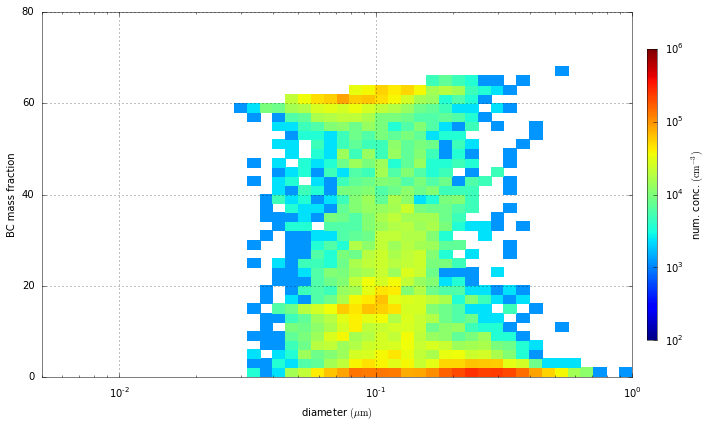

In [1]:
%matplotlib inline
import numpy
import partmc
import scipy
import mpl_helper
import config
import random
import matplotlib
import math
import sys

import matplotlib.pyplot as plt
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

def grid_box_histogram(time):

    # filename prefix
    dir = config.data_dir
    prefix = config.file_prefix
    filename =  '%s_%08i.nc' %(prefix,time)

    # make grids
    diam_axis = partmc.log_grid(min=1e-9,max=1e-6,n_bin=60)
    bc_axis = partmc.linear_grid(min=0,max=1.,n_bin=50)

    # load the file
    ncf = scipy.io.netcdf.netcdf_file(config.data_dir+'/'+filename, 'r')
    particles = partmc.aero_particle_array_t(ncf)
    ncf.close()

    # compute the values
    bc = particles.masses(include = ["BC"])
    dry_mass = particles.masses(exclude = ["H2O"])
    bc_frac = bc / dry_mass
    dry_diameters = particles.dry_diameters()

    # 2D histogram
    hist_2d_bc = partmc.histogram_2d(dry_diameters, bc_frac, diam_axis, bc_axis,
         weights = 1 / particles.comp_vols)
    # convert
    hist_2d_bc /= 1e6

    # create the figure
    width_in = 10.0
    (figure, axes, cbar_axes) = mpl_helper.make_fig(figure_width=width_in,
        colorbar=True,left_margin=.7,right_margin=1.1, top_margin=0.3,
        bottom_margin=.65, colorbar_height_fraction=0.8)

    # Data min and max
    # we want this to be fixed for all time
    data_min = 10**2 #min(data_mins)
    data_max = 10**6 #max(data_maxes)

    norm = matplotlib.colors.LogNorm(vmin=data_min, vmax=data_max)
    p = axes.pcolormesh(diam_axis.edges()/1e-6, bc_axis.edges()*100, 
        hist_2d_bc.transpose(),norm = norm, linewidths = 0.1, edgecolors='None')

    # make the plot pretty
    axes.set_xscale('log')
    axes.set_yscale('linear')
    xlabel = r'diameter $(\mu \rm m)$'
    ylabel = r'BC mass fraction'
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(.005,1)
    axes.set_ylim(0,80)
    axes.set_yticks([0,20,40,60,80])
    axes.grid(True)

    # colorbar
    cbar = figure.colorbar(p, cax=cbar_axes,
                format=matplotlib.ticker.LogFormatterMathtext(),
                orientation='vertical')
    kwargs = {}
    kwargs["format"] = matplotlib.ticker.LogFormatterMathtext()
    cmappable = matplotlib.cm.ScalarMappable(norm=norm)
    cmappable.set_array(numpy.array([hist_2d_bc.min(), hist_2d_bc.max()]))
    cbar_label = r"num. conc. $(\rm cm^{-3})$"
    cbar.set_label(cbar_label)
    cbar.solids.set_edgecolor("face")

    # Save figure and print name
    #fig_name = '%s/bc_plot_%08i.pdf' % \
    #   (config.fig_dir, time)
    #figure.savefig(fig_name)

    #plt.plot()
    
    # print name in case we need it
    #print fig_name

    return

# Get args from command line
#time = int(2)
#print x,y,z,time
# Call the plot function for grid cell
#grid_box_histogram(time)

interact(grid_box_histogram, time=widgets.IntSlider(min=1,max=24,value=1))